# KMeans

In [1]:
import numpy as np
import pandas as pd



In [2]:
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv(r'C:\Users\User\Desktop\Abhiram S3bca\USArrests.csv',index_col=0)

In [4]:
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
data.shape

(50, 4)

In [6]:
x = data[['Murder','Assault','UrbanPop','Rape']]

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=10,init='k-means++')
    km.fit(x)
    css = km.inertia_
    wcss.append(css)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


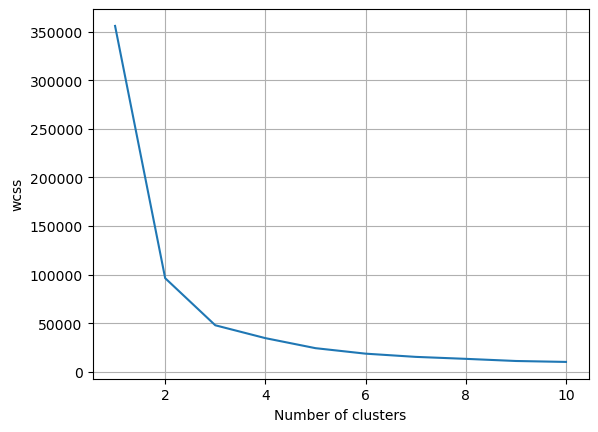

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

In [10]:
km = KMeans(n_clusters=3,n_init=10)

In [11]:
km.fit(x)

KMeans(n_clusters=3)

In [12]:
cluster_labels=km.predict(x)

In [13]:
cluster_labels

array([2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1])

In [14]:
pd.Series(cluster_labels).value_counts()

0    20
2    16
1    14
dtype: int64

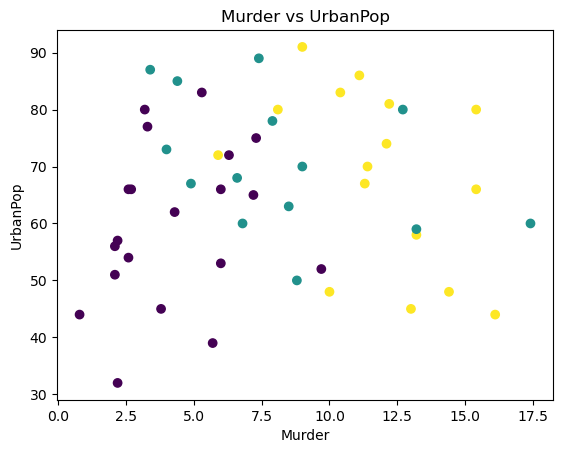

In [15]:
plt.scatter(x['Murder'],x['UrbanPop'],c=cluster_labels)
plt.xlabel("Murder")
plt.ylabel("UrbanPop")
plt.title('Murder vs UrbanPop')
plt.show()

In [16]:
cluster_indices = np.where(cluster_labels == 0)[0]

In [17]:
data['Cluster_labels']=cluster_labels

In [18]:
data


,Murder,Assault,UrbanPop,Rape,Cluster_labels
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,1


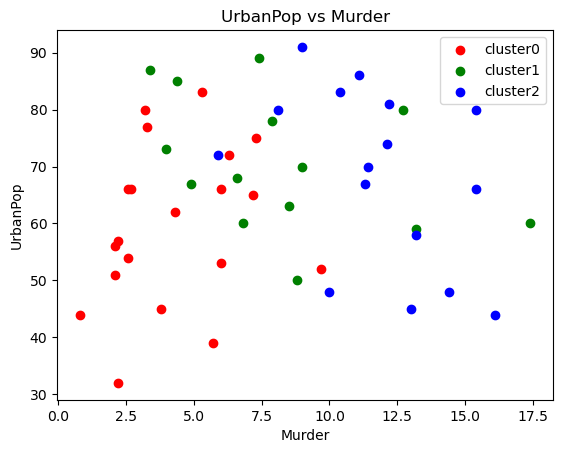

In [19]:
colors = ['r','g','b']
for i in range(max(cluster_labels)+1):
    cluster_data=x[cluster_labels==i]
    plt.scatter(cluster_data['Murder'],
               cluster_data['UrbanPop'],
               c=colors[i],
               label=f'cluster{i}')
plt.xlabel("Murder")
plt.ylabel("UrbanPop")
plt.title('UrbanPop vs Murder')
plt.legend()

In [20]:
silhouette_avg1 = silhouette_score(x,cluster_labels)
print(silhouette_avg1)

0.5319024108339817


# Hierarchial



In [21]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [22]:
mergings = linkage(x,method="ward")

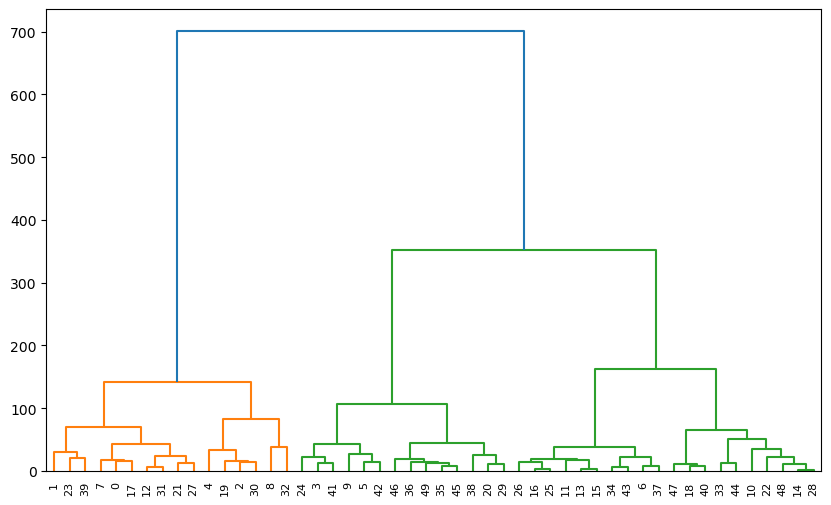

In [23]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [24]:
cluster_labels = fcluster(mergings,500,criterion="distance")

In [25]:
cluster_labels

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

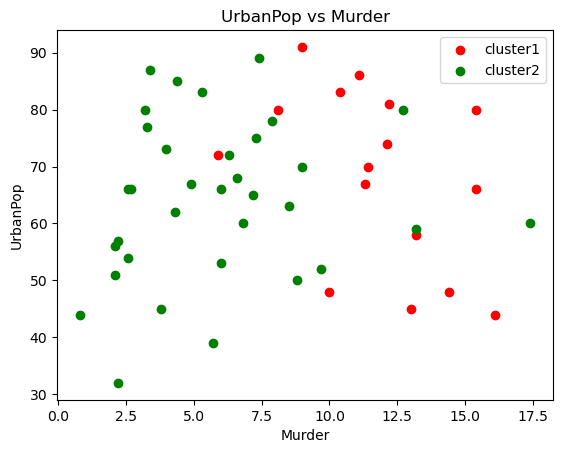

In [26]:
colors = ['r','g']
for i in range(1,max(cluster_labels)+1):
    cluster_data=x[cluster_labels==i]
    plt.scatter(cluster_data['Murder'],
               cluster_data['UrbanPop'],
               c=colors[i-1],
               label=f'cluster{i}')
plt.xlabel("Murder")
plt.ylabel("UrbanPop")
plt.title('UrbanPop vs Murder')
plt.legend()

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
silhouette_avg1 = silhouette_score(x,cluster_labels)
print(silhouette_avg1)

0.576270501827592
